In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
latent = pickle.load( open( "data.p", "rb" ) )
distances = pickle.load( open( "distances_normal.p", "rb" ) )

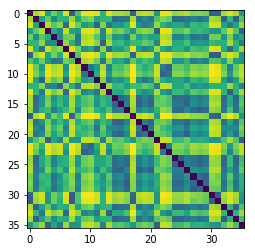

In [3]:
plt.imshow(distances)
plt.show()

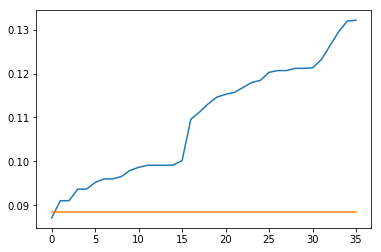

In [17]:
def min_k(x, x_id, k):
    val = [(v, i) for i, v in enumerate(list(x)) if i != x_id]
    val = sorted(val, key=lambda x: x[0])
    return val[0:k]

def is_max(i, knn, densities):
    maximum = True
    for k in knn:
        maximum = maximum and densities[i] > densities[k[1]] 
    return maximum
    
def dense_region(i, knn):
    knn_ids = [x[1] for x in knn]
    knn_ids.append(i)
    return knn_ids
    
def density(x, k):
    knns = []
    for i in range(0, len(x)):
        knns.append(min_k(x[i, :], i, k))
    dense = np.zeros(len(knns))
    for i, knn in enumerate(knns):
        dense[i] = 1.0 / knn[-1][0]
    th = np.percentile(dense, 1)
    
    plt.plot(sorted(dense))
    plt.plot(np.ones(len(dense)) * th)
    plt.show()

    return [dense_region(i, knn) for i, knn in enumerate(knns) if is_max(i, knn, dense) and dense[i] >= th]

clusters = density(distances, 3)

In [18]:
c = [[] for i in range(len(clusters))]
for cluster_id, x in enumerate(clusters):
    print(x)
    for i in x:        
        c[cluster_id].append(latent[i][1])

[11, 2, 33, 6]
[22, 23, 9, 10]
[15, 14, 20, 18]
[7, 30, 0, 31]
[21, 3, 5, 35]


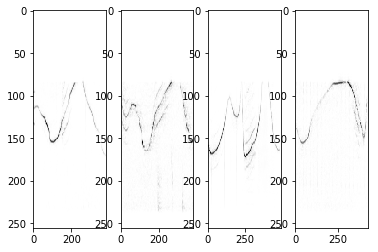

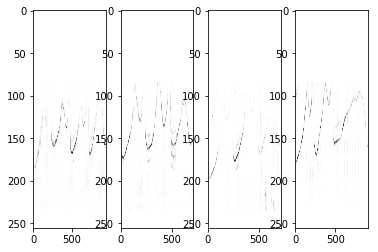

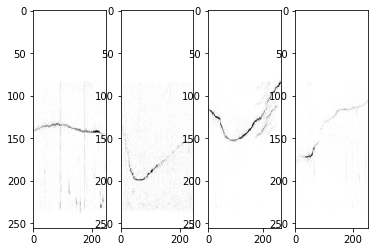

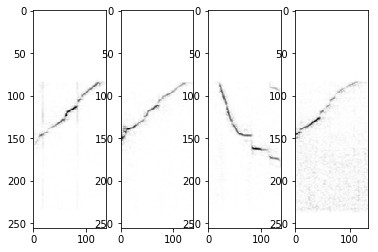

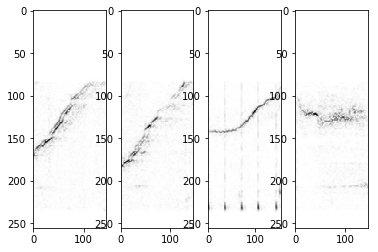

In [19]:
from numpy.fft import fft

def fwd_spectrogram(audio, win=512, step=64):
    '''
    Compute the spectrogram of audio data

    audio: one channel audio
    win: window size for dft sliding window
    step: step size for dft sliding windo
    '''
    spectrogram = []
    hanning = np.hanning(win)
    for i in range(win, len(audio), step):
        start = win // 2        
        dft = np.abs(fft(audio[i - win: i] * hanning))[start:win]
        spectrogram.append(dft)
    return np.array(spectrogram)

for cid, x in enumerate(c):
    if len(x) > 1:
        for i, a in enumerate(x):
            plt.subplot(1, len(x), i + 1)
            spec = fwd_spectrogram(a)
            plt.imshow(1.0 - spec.T, cmap='gray', aspect='auto')
        plt.savefig('density_{}.png'.format(cid))
        plt.show()
